<h1>Ultimate Take Home Challenge</h1>
<h3>Part 1 - Exploratory Data Analysis</h3>
<p>The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.</p>

<p>I will be splitting this up into two parts:</p>
<p>1. The code which I will try and document/comment as best as I can with interesting observations. <br>2. The summary of what we found in the data and how we can use the insights from a business perspective.</p>

Importing libraries needed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Reading data and exploring the data to see what we are dealing with. It looks like each observable is a record of the login time. We can create a timeseries of this and do more analysis.

In [2]:
data = pd.read_json("logins.json")
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


<p>Re-sampling the data into 15 minute intervals and counting the time of each login.</p>

In [3]:
data['count'] = 1
df = data.set_index('login_time')
df.head()
intervals = df.resample('15T').sum()
intervals.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<p>We note that this data is between January 1, 1970 to April 13, 1970. </p>
<p>Let's resample the data into hourly averages and look at the patterns for each full month.</p>

In [4]:
intervals_hourly = intervals.resample('H').mean()

In [5]:
intervals_hourly['month'] = intervals_hourly.index.month
intervals_hourly['day'] = intervals_hourly.index.day
intervals_hourly['hour'] = intervals_hourly.index.hour
intervals_hourly['weekday'] = 'Maybe'
intervals_hourly['weekend'] = 'Maybe'

In [6]:
january = intervals_hourly[intervals_hourly['month'] == 1]
february = intervals_hourly[intervals_hourly['month'] == 2]
march = intervals_hourly[intervals_hourly['month'] == 3]

Text(0.5,1,'Fig 1 - January Daily Cycle of Useage')

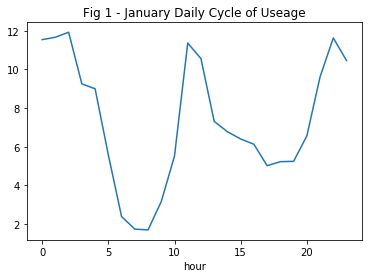

In [22]:
january_hourly = january.groupby(['hour']).mean()
february_hourly = february.groupby(['hour']).mean()
march_hourly = march.groupby(['hour']).mean()
january_hour = january_hourly['count'].plot()
january_hour.set_title('Fig 1 - January Daily Cycle of Useage')

Text(0.5,1,'Fig 2 - February Daily Cycle of Useage')

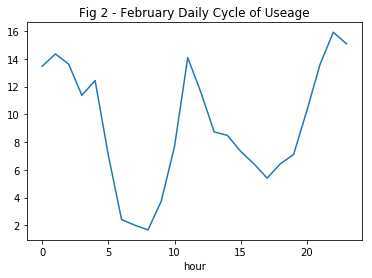

In [23]:
february_hour = february_hourly['count'].plot()
february_hour.set_title('Fig 2 - February Daily Cycle of Useage')

Text(0.5,1,'Fig 3 - March Daily Cycle of Useage')

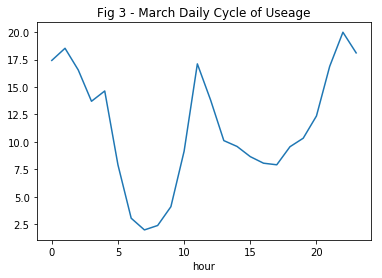

In [24]:
march_hour = march_hourly['count'].plot()
march_hour.set_title('Fig 3 - March Daily Cycle of Useage')

<p>We can see from the monthly averages, that peak hours is between 11AM - 1PM and 9PM - 11pm. From a business perspective, we can perhaps start targeting advertisements at 11AM - 1PM and 9pm - 11pm.</p>
<p>We can also see from the above charts that there is a usual peak in login time</p>

In [10]:
for index, row in intervals_hourly.iterrows():
    row['weekend'] = datetime.date(1970,row['month'], row['day']).weekday()

In [13]:
for index, row in intervals_hourly.iterrows():
    if row['weekday'] == 4:
        intervals_hourly.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 5:
        intervals_hourly.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 6:
        intervals_hourly.loc[index, 'weekend'] = 'Yes'
    else:
        intervals_hourly.loc[index, 'weekend'] = 'No'

Text(0.5,1,'Fig. 4 - Box Plot of daily weekend per hour of useage')

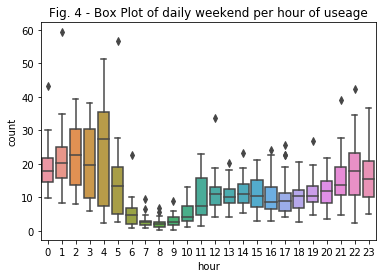

In [25]:
weekend_box = sns.boxplot(x="hour", y="count",data=intervals_hourly[intervals_hourly['weekend'] =='Yes'])
weekend_box.set_title('Fig. 4 - Box Plot of daily weekend per hour of useage')

Text(0.5,1,'Fig 5 - Box Plot of daily weekday per hour of usage')

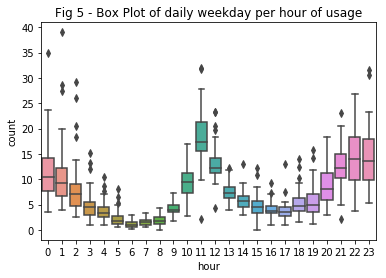

In [26]:
weekday_box = sns.boxplot(x="hour", y="count",data=intervals_hourly[intervals_hourly['weekend'] =='No'])
weekday_box.set_title('Fig 5 - Box Plot of daily weekday per hour of usage')

In [28]:
intervals_daily = intervals.resample('D').sum()
intervals_daily['month'] = intervals_daily.index.month
intervals_daily['day'] = intervals_daily.index.day
intervals_daily['hour'] = intervals_daily.index.hour
intervals_daily['weekday'] = 0

In [29]:
for index, row in intervals_daily.iterrows():
    row['weekday'] = datetime.date(1970,row['month'], row['day']).weekday()

In [30]:
intervals_daily.head()

,count,month,day,hour,weekday
login_time,,,,,
1970-01-01,112,1,1,0,3
1970-01-02,681,1,2,0,4
1970-01-03,793,1,3,0,5
1970-01-04,788,1,4,0,6
1970-01-05,459,1,5,0,0


In [31]:
intervals_daily['weekend'] = 'Maybe'

In [32]:
for index, row in intervals_daily.iterrows():
    if row['weekday'] == 4:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 5:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 6:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    else:
        intervals_daily.loc[index, 'weekend'] = 'No'

In [33]:
intervals_daily.head()

,count,month,day,hour,weekday,weekend
login_time,,,,,,
1970-01-01,112,1,1,0,3,No
1970-01-02,681,1,2,0,4,Yes
1970-01-03,793,1,3,0,5,Yes
1970-01-04,788,1,4,0,6,Yes
1970-01-05,459,1,5,0,0,No


Text(0.5,1,'Figure 6 - Weekday Boxplot')

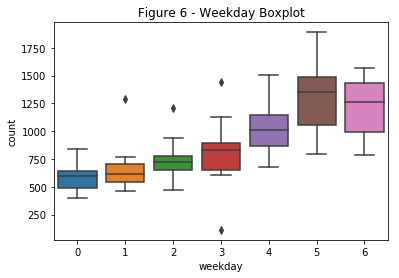

In [34]:
weekdays = sns.boxplot(x='weekday', y='count', data=intervals_daily)
weekdays.set_title('Figure 6 - Weekday Boxplot')

<p>We can see here that users typically login more on weekends vs weekdays. There are some outliers that will need to be explored (i.e. on Tuesday, Wednesday, and Friday) to ensure we know that there are no faults in the data. </p>

<h3>Summary of Findings/Next Steps</h3>

<p>Summary of Findings</p>
<p>1. Based on the sample size we have of 3 months, we can see that there is a peak login at around 11AM - 1PM and 9PM - 11PM. Based on intuition, we would assume that this is because users login during lunch and right before they sleep. <br>2. We see that users typically do not login at night time - suspecting that this is sleeping time. <br>3. We see there is a spike in useage during the weekend as well. </p>

<p>Next steps</p>
<p>1. There seems to be a few outliers per figure 6. There are a few daily datapoints that appear to be higher on Tuesday, Wednesday and Thursday that require further explanation. There may have been a bug or a promotion going on during these days which caused the spikes, however we will still need to explore more. <br>2. Based on users logging in, we can target ads at 11AM - 1PM and 9PM - 11PM on average for weekdays (per figure - 5). We can also push ads on weekends per figure 6 that users log in more on weekends vs weekdays.</p>
